## Laboratorium 2 - Daniel Jurkowski

### Linear regression with one variable

#### Zadanie 1 i 2

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

x = data.values[:,0]
y = data.values[:,1]

data.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [14]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


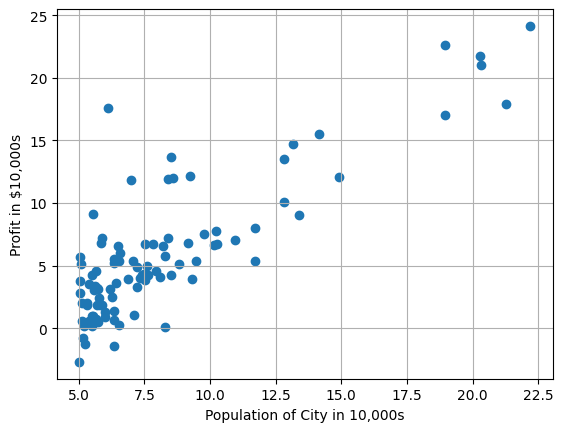

In [15]:
plt.scatter(x, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid()
plt.show()

#### Zadanie 3, 4, 5, 6, 7

In [16]:
data.insert(0, 'Ones', 1)
X = [data['Ones'], data['Population']]
Y = data['Profit']

X = np.matrix(X)
Y = np.matrix(Y.values)
theta = np.matrix(np.array([0.,0.]))

In [17]:
def cost_function(X, Y, theta):
    m = Y.shape[1]

    return np.sum(np.square(theta*X - Y)) / (2 * m)

# test of function
print(cost_function(X, Y, theta))

32.072733877455676


In [18]:
def gradient_method(X, Y, theta, alpha, iter):
    costs = []

    for i in range(iter):
        theta[0, 0] = theta[0, 0] - (alpha / X.shape[1]) * np.sum(theta*X - Y)
        theta[0, 1] = theta[0, 1] - (alpha / X.shape[1]) * np.sum((theta*X - Y) * X.T)
        cost = cost_function(X, Y, theta)
        costs.append(cost)

    return costs[-1], theta, costs

#### Zadanie 8, 9, 10

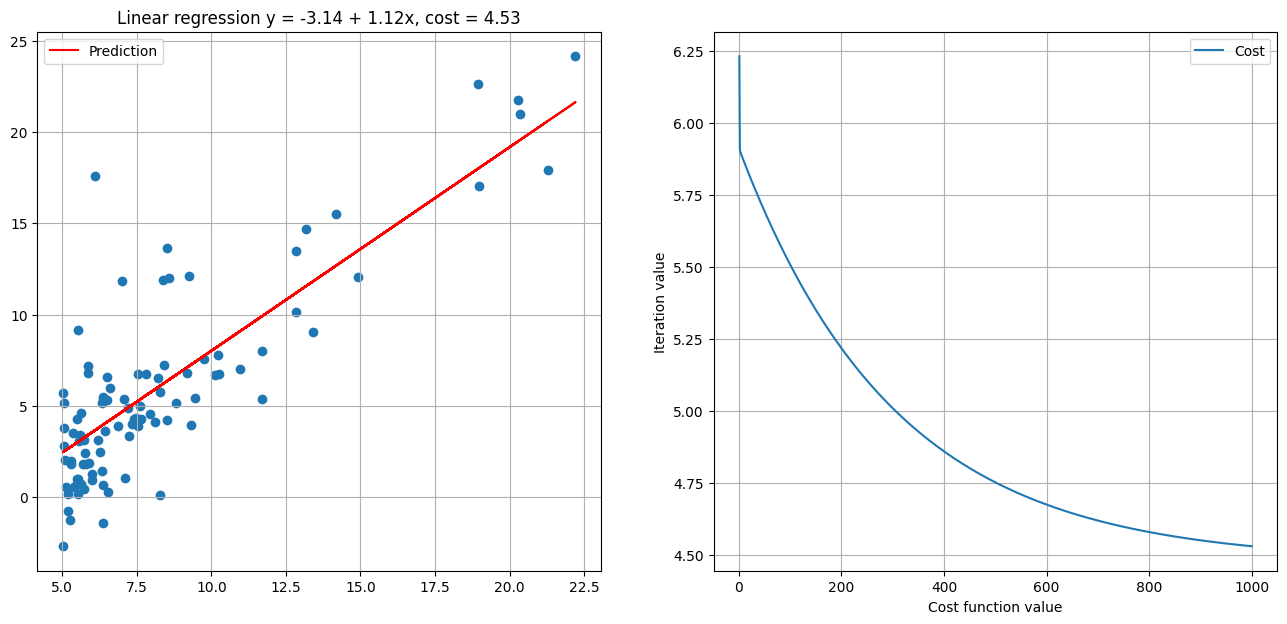

In [19]:
alpha = 0.01
iter = 1000

cost, theta, costs = gradient_method(X, Y, theta, alpha, iter)

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].scatter(x, y)
ax[0].plot(data['Population'], theta[0, 0] + theta[0, 1] * data['Population'], '-r', label='Prediction')
ax[0].grid()
ax[0].legend()
ax[0].set_title(f'Linear regression y = {theta[0, 0]:.2f} + {theta[0, 1]:.2f}x, cost = {cost:.2f}')
ax[1].plot(np.arange(1, iter + 1), costs, label='Cost')
ax[1].grid()
ax[1].set_xlabel('Cost function value')
ax[1].set_ylabel('Iteration value')
ax[1].legend()
plt.show()

### Linear regression with multiple variables

#### Zadanie 1

In [20]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [21]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [22]:
data2_norm = (data2 - data2.mean())/(data2.std())
data2_norm = data2_norm
data2_norm.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### Zadanie 2

In [23]:
data2_norm.insert(0, 'Ones', 1)
X = [data2_norm['Ones'], data2_norm['Size'], data2_norm['Bedrooms']]
Y = data2['Price']

X = np.matrix(X)
Y = np.matrix(Y.values)
theta = np.matrix(np.array([0.,0., 0.]))

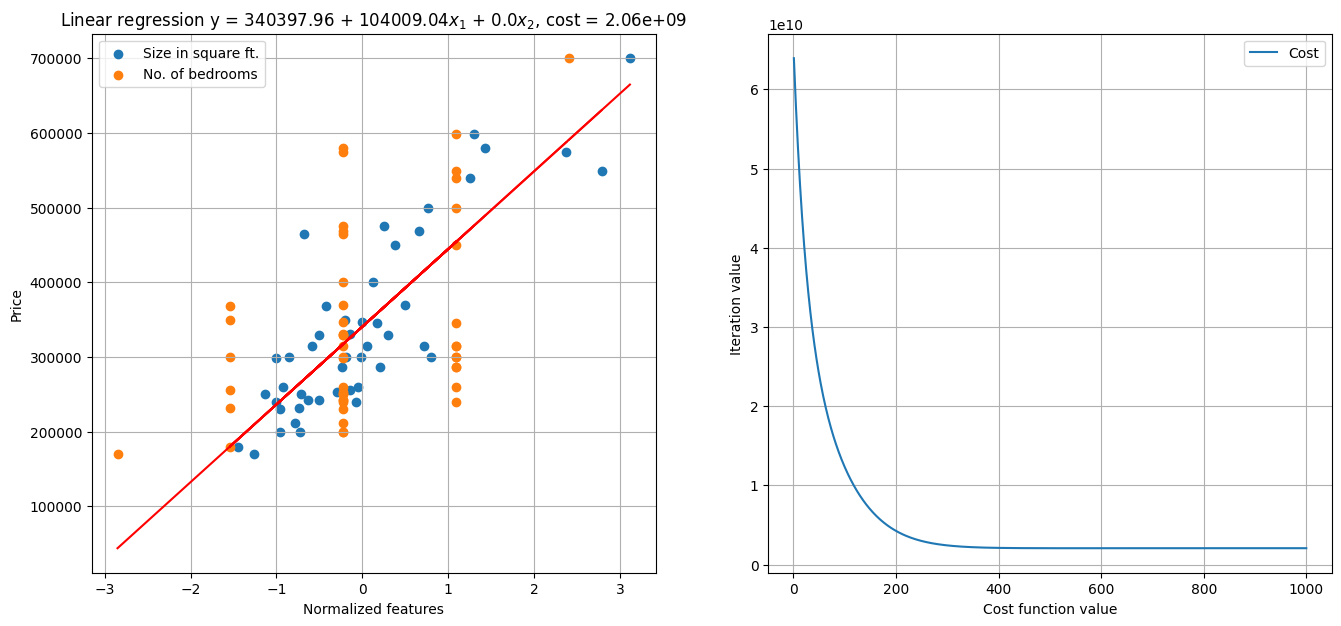

In [24]:
cost, theta, costs = gradient_method(X, Y, theta, alpha, iter)

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].scatter(data2_norm['Size'], data2['Price'], label='Size in square ft.')
ax[0].scatter(data2_norm['Bedrooms'], data2['Price'], label='No. of bedrooms')
ax[0].plot(np.matrix([data2_norm['Size'], data2_norm['Bedrooms']]), theta[0, 0] + theta[0, 1]*np.matrix([data2_norm['Size'], data2_norm['Bedrooms']]) , '-r')
ax[0].grid()
ax[0].legend()
ax[0].set_title(f'Linear regression y = {theta[0, 0]:.2f} + {theta[0, 1]:.2f}$x_{1}$ + {theta[0, 2]}$x_{2}$, cost = {cost:.2e}')
ax[0].set_xlabel('Normalized features')
ax[0].set_ylabel('Price')
ax[1].plot(np.arange(1, iter + 1), costs, label='Cost')
ax[1].grid()
ax[1].set_xlabel('Cost function value')
ax[1].set_ylabel('Iteration value')
ax[1].legend()
plt.show()